In [12]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [13]:
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts/1000, 1/6

(tensor([0.1720, 0.1430, 0.1850, 0.1540, 0.1770, 0.1690]), 0.16666666666666666)

tensor([[1., 2., 2., 0., 3., 2.],
        [2., 1., 1., 3., 3., 0.],
        [1., 2., 2., 2., 3., 0.],
        ...,
        [1., 1., 2., 2., 3., 1.],
        [3., 1., 2., 2., 2., 0.],
        [3., 2., 1., 1., 1., 2.]]) 
 tensor([[  1.,   2.,   2.,   0.,   3.,   2.],
        [  3.,   3.,   3.,   3.,   6.,   2.],
        [  4.,   5.,   5.,   5.,   9.,   2.],
        ...,
        [812., 800., 859., 849., 863., 797.],
        [815., 801., 861., 851., 865., 797.],
        [818., 803., 862., 852., 866., 799.]])
tensor([[ 10.],
        [ 20.],
        [ 30.],
        [ 40.],
        [ 50.],
        [ 60.],
        [ 70.],
        [ 80.],
        [ 90.],
        [100.],
        [110.],
        [120.]]) ......


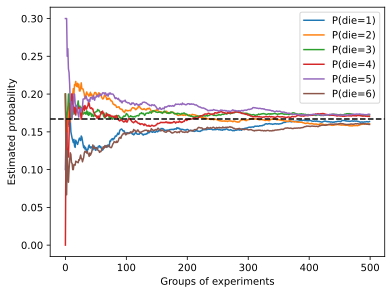

In [14]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0) # 累积和，dim=0从上往下加
print(counts, '\n', cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
print(cum_counts.sum(dim=1, keepdims=True)[:12,], '......')

d2l.set_figsize((6, 4.5))
for i in range(6): # 0~5
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [3]:
import torch
# 查找模块中的所有函数和类
print(dir(torch.Tensor))

['H', 'T', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__cuda_array_interface__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rfloordiv__', '__rlshift__', '__rmat

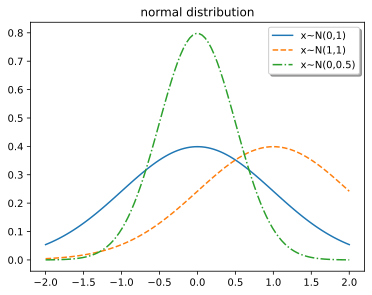

In [24]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import torch
import math

def normal(mu, sigma, x):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)
'''绘制正态分布函数图像'''
# x= np.arange(-2, 2, 0.1)
x = np.linspace(-2, 2, 100)
y = normal(0, 1, x)
z = normal(1, 1, x)
h = normal(0, 0.5, x)

fig, ax= plt.subplots(1)
# 此处不能重复调用x1,y1，而应该用x和np.exp代替，或者用y.detach()定住，否则报错。
ax.plot(x, y, label='x~N(0,1)', linestyle='-')
ax.plot(x, z, label='x~N(1,1)', linestyle='--')
ax.plot(x, h, label='x~N(0,0.5)', linestyle='-.')
ax.legend(shadow=True)
plt.title('normal distribution')

plt.show()

In [4]:
# 查找特定函数和类的用法
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

In [8]:
torch.ones?

In [10]:
torch.Tensor??